In [3]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

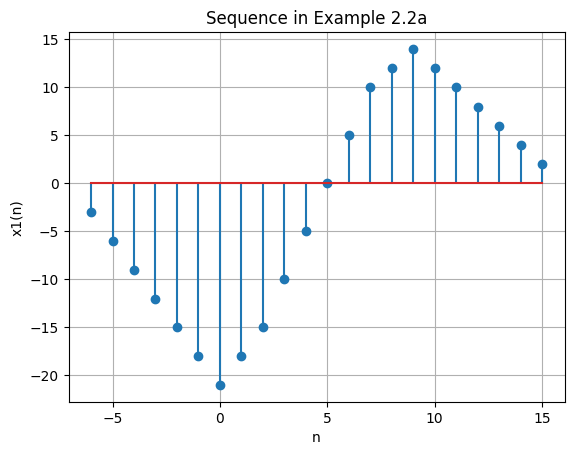

In [ ]:
#  a. x1(n)=2x(n−5)−3x(n+4)

def sigshift(x, n, shift):
    n_shifted = n + shift  # ইনডেক্স শিফট করা
    return x, n_shifted

# সিগন্যাল যোগ করার ফাংশন
def sigadd(x1, n1, x2, n2):
    n_min = min(min(n1), min(n2))
    n_max = max(max(n1), max(n2))
    n = np.arange(n_min, n_max+1)

    y1 = np.zeros(len(n))
    y2 = np.zeros(len(n))

    y1[np.isin(n, n1)] = x1
    y2[np.isin(n, n2)] = x2

    return y1 + y2, n

# মূল সিগন্যাল এবং ইনডেক্স
n = np.arange(-2, 11)
x = np.array([1,2,3,4,5,6,7,6,5,4,3,2,1])

# শিফট করা সিগন্যাল
x11, n11 = sigshift(x, n, 5)   # 5 ইউনিট ডানদিকে শিফট
x12, n12 = sigshift(x, n, -4)  # 4 ইউনিট বামদিকে শিফট

# ২ গুণ এবং -৩ গুণ করে যোগ করা
x11 = 2 * x11
x12 = -3 * x12
x1, n1 = sigadd(x11, n11, x12, n12)

# প্লট করা
plt.stem(n1, x1)
plt.title('Sequence in Example 2.2a')
plt.xlabel('n')
plt.ylabel('x1(n)')
plt.grid(True)
plt.show()


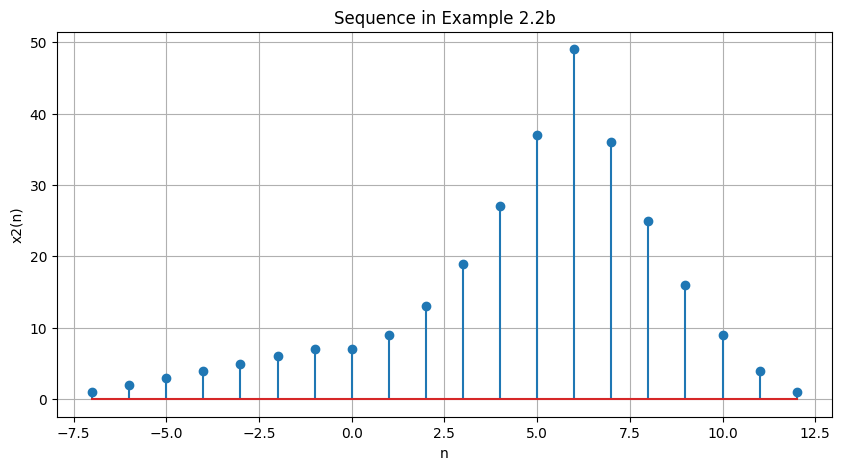

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  b. x2(n)=x(3−n)+x(n)x(n−2)

# শিফট করার ফাংশন
def shifted(x, n, shift):
    shifted_value = n + shift
    return x, shifted_value

# ভাঁজ (folding) করার ফাংশন
def folding(x, n):
    return np.flip(x), -np.flip(n)

# সংকেত যোগ করার ফাংশন
def signal_add(x1, n1, x2, n2):
    n_min = min(min(n1), min(n2))
    n_max = max(max(n1), max(n2))
    n = np.arange(n_min, n_max+1)

    y1 = np.zeros(len(n))
    y2 = np.zeros(len(n))

    # ইনডেক্স বের করে মান সেট করা

    y1[np.isin(n, n1)] = x1
    y2[np.isin(n, n2)] = x2



    return y1 + y2, n

# মূল সিগন্যাল
n = np.arange(-2, 11)
x = np.array([1,2,3,4,5,6,7,6,5,4,3,2,1])

# x(3-n) এর জন্য: ভাঁজ করা + শিফট করা
x_fold, n_fold = folding(x, n)       # ভাঁজ করা
x21, n21 = shifted(x_fold, n_fold, 3) # 3 ইউনিট শিফট

# x(n) x(n-2) এর জন্য:
x22, n22 = shifted(x, n, 2)  # 2 ইউনিট শিফট
x22 = x * x22                # গুণফল

# চূড়ান্ত যোগফল: x2(n) = x(3-n) + x(n) x(n-2)
x2, n2 = signal_add(x21, n21, x22, n22)

# চিত্রায়ন
plt.figure(figsize=(10,5))
plt.stem(n2, x2)
plt.title('Sequence in Example 2.2b')
plt.xlabel('n')
plt.ylabel('x2(n)')
plt.grid(True)
plt.show()
